# Tennis Game

## Data Analyzing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm


In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
GameInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/GameInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchAwayScoreInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchAwayScoreInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchAwayTeamInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchAwayTeamInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchEventInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchEventInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchHomeScoreInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchHomeScoreInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchHomeTeamInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchHomeTeamInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchRoundInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchRoundInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchSeasonInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchSeasonInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchTimeInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchTimeInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchTournamentInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchTournamentInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchVenueInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchVenueInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
MatchVotesInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchVotesInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
OddsInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/OddsInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
PeriodInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/PeriodInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
PowerInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/PowerInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()


### 1. How many tennis players are included in the dataset?

#### Solution 1: Using Player ID

In [4]:
player_id = pd.concat([MatchAwayTeamInfo["player_id"], MatchHomeTeamInfo["player_id"]])
player_num = player_id.unique().size
print(color.GREEN+'The Total number of teniss players is' +color.END, player_num)

The Total number of teniss players is 2352


#### Solution 2: Using Player full name

In [5]:
player_full_name = pd.concat([MatchAwayTeamInfo["full_name"], MatchHomeTeamInfo["full_name"]])
player_num = player_full_name.unique().size
print(color.GREEN+'The Total number of teniss players is' +color.END, player_num)

The Total number of teniss players is 2353


### 2.  What is the average height of the players?


The Average height of players is 1.82


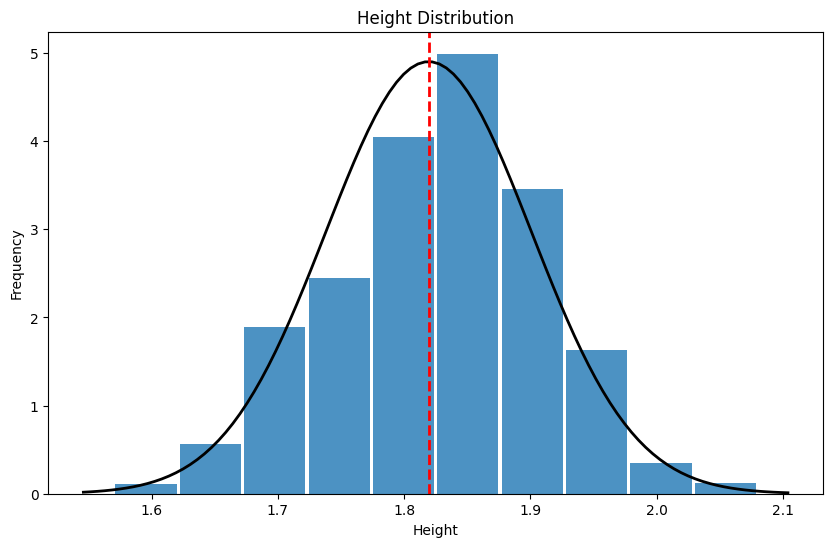

In [20]:
player_info = pd.concat([MatchAwayTeamInfo[["player_id", "height"]]
                        , MatchHomeTeamInfo[["player_id", "height"]]])

cleaned_player_info = player_info.dropna()
height_mean = cleaned_player_info['height'].mean().round(2)
print(color.PURPLE+ 'The Average height of players is' +color.END, height_mean)

# Plot
data = cleaned_player_info['height']

plt.figure(figsize=(10,6))
plt.hist(data, bins=10, density=True, alpha=0.8, rwidth=0.95)

mu, std = norm.fit(data) 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.axvline(height_mean, color='red', linestyle='dashed', linewidth=2, label=f'{height_mean:.2f}')
plt.title ('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

### 3.  Which player has the highest number of wins?


Step 1: Merging required tables

In [21]:

merged_game_home = pd.merge(GameInfo, MatchHomeTeamInfo, on='match_id', suffixes=['_home']).drop_duplicates()
merged_game_away = pd.merge(GameInfo, MatchAwayTeamInfo, on='match_id', suffixes=['_away']).drop_duplicates()
# Ignore null values
home_game_wins = merged_game_home[merged_game_home['scoring'] == 1][['player_id', 'name']].copy()
away_game_wins = merged_game_away[merged_game_away['scoring'] == 2][['player_id', 'name']].copy()

# Concating home and away team wins
all_game_wins = pd.concat([home_game_wins, away_game_wins]).drop_duplicates()
all_game_wins.head()

,player_id,name
0,314519,Semenistaja D.
376,256104,Volynets K.
521,92074,Galán D.
675,213943,Osorio C.
884,202462,Malõgina E.


Step 2: Calculate the highest number of wins

In [8]:
win_game_counts = all_game_wins['player_id'].value_counts().reset_index()
win_game_counts.columns = ['player_id', 'wins']
player_names = all_game_wins[['player_id', 'name']].drop_duplicates()
win_counts = win_game_counts.merge(player_names, on='player_id')
top_player = win_counts.loc[win_counts['wins'].idxmax()]
print(color.CYAN+ 'Player with the highest number of wins is' +color.END, top_player['name'], color.CYAN+ 'with' +color.END, top_player['wins'], color.CYAN+ 'wins')

Player with the highest number of wins is Yunchaokete B. with 2 wins


In [22]:
top_100_Player =win_counts.sort_values(by='wins', ascending=False).head(100)
top_100_Player_mean =top_100_Player['wins'].mean()

# Create a bar plot
fig = px.bar(
    top_100_Player,
    x='name',
    y='wins',
    color='wins',
    title='number of wins',
    labels={'name': 'Name', 'win_counts': 'Count of win'},
    height=800,
    width=1700
)
# Add a line representing the average breaks of serve per match
fig.add_trace(go.Scatter(
    x=top_100_Player['name'],
    y=[top_100_Player_mean] * len(top_100_Player),
    mode='lines',
    name=f'Average Wins: {top_100_Player_mean}',
    line=dict(color='red', dash='dash')
))

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Player Name',
    yaxis_title='Number of Wins',
    barmode='group'
)



# Show the figure
fig.show()

### 4.  What is the longest match recorded in terms of duration?


Solution 1: Group by 

In [26]:
# first i have the take the table from the begining and read it in the first format 
MatchTimeInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchTimeInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()


# Calculate the sum of the periods
MatchTimeInfo['total_seconds'] = (MatchTimeInfo[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].sum(axis=1))/60
# Convert the total time to a timedelta object
MatchTimeInfo['total_time'] = pd.to_timedelta(MatchTimeInfo['total_seconds'], unit='s')
MatchTimeInfo = MatchTimeInfo[['match_id' ,'total_time' ]].sort_values(by='total_time', ascending=False)

groupedTennisTimes_perMatchId = MatchTimeInfo.groupby('match_id').sum().sort_values(by='total_time', ascending=False).drop_duplicates(subset='total_time').reset_index()
display(groupedTennisTimes_perMatchId)
# Get the longest duration
longest_duration = groupedTennisTimes_perMatchId.iloc[0]['total_time']
longestMatchId = groupedTennisTimes_perMatchId.iloc[0]['match_id']

print(f"The longest duration is: {longest_duration} and the match id is {longestMatchId}")

,match_id,total_time
0,12300269,0 days 02:17:31.983333333
1,12336297,0 days 02:15:35.183333333
2,12357962,0 days 02:09:03.833333333
3,12346747,0 days 01:35:05.083333332
4,12295121,0 days 01:25:23.900000
...,...,...
5681,12334984,0 days 00:00:00.350000
5682,12311868,0 days 00:00:00.316666667
5683,12311067,0 days 00:00:00.150000
5684,12291498,0 days 00:00:00.133333333


The longest duration is: 0 days 02:17:31.983333333 and the match id is 12300269


Solution 2: Pivote_table

### 5.	How many sets are typically played in a tennis match?

In [27]:
count_set_per_match = GameInfo.groupby('match_id')['set_id'].max().sort_values(ascending=False)
count_set_df = pd.DataFrame(count_set_per_match[count_set_per_match.values > 1].value_counts())
count_set_df['percentage'] = (count_set_df / count_set_df.sum())*100
count_set_df

# plot
labels = ['Set_2', 'Set_3', 'Set_4', 'Set_5']
fig = px.pie(
    count_set_df,
    values='percentage',
    names=labels ,
    title='Percentage of Sets Played in Matches',
    hole=0.3  # Optional: makes it a donut chart
)

# Customize the layout
fig.update_layout(
    width=400,
    height=400,
    margin=dict(l=20, r=20, t=40, b=20)  # Adjust the margins as needed
)
# Show the chart
fig.show()

### 6.	Which country has produced the most successful tennis players?

In [28]:

merged_game_home = pd.merge(GameInfo, MatchHomeTeamInfo, on='match_id', suffixes=['_home']).drop_duplicates()
merged_game_away = pd.merge(GameInfo, MatchAwayTeamInfo, on='match_id', suffixes=['_away']).drop_duplicates()

home_wins = merged_game_home[merged_game_home['scoring'] == 1][['player_id', 'name', 'country']].copy()
away_wins = merged_game_home[merged_game_home['scoring'] == 2][['player_id', 'name', 'country']].copy()

all_wins = pd.concat([home_wins, away_wins])

win_counts = all_wins['player_id'].value_counts().reset_index()
win_counts.columns = ['player_id', 'wins']

player_names = all_wins[['player_id', 'name', 'country']].drop_duplicates()
win_counts = win_counts.merge(player_names, on='player_id')

win_country = win_counts.groupby(['country']).count()['wins'].sort_values(ascending=False)
win_country
print(color.GREEN+ 'Most of wins belong to' +color.END, win_country.idxmax(), color.GREEN+ 'with' +color.END, win_country[win_country.idxmax()], color.GREEN+ 'wins')

Most of wins belong to USA with 161 wins


### 7.  What is the average number of aces per match?


In [13]:
aces_info = PeriodInfo[(PeriodInfo['statistic_name'] == 'aces') & (PeriodInfo['period'] == 'ALL')]
ace_count =pd.DataFrame(pd.pivot_table(aces_info, values=['statistic_name'],index='match_id', aggfunc='count'))
ace_avg = ace_count.sort_values('statistic_name',ascending=False).mean().iloc[0]
print(color.PURPLE+ 'The average number of aces per match is' + color.END, ace_avg.round(2))

The average number of aces per match is 1.46


### 8.	Is there a difference in the number of double faults based on gender?

gender
F    2528
M    2484
Name: statistic_name, dtype: int64

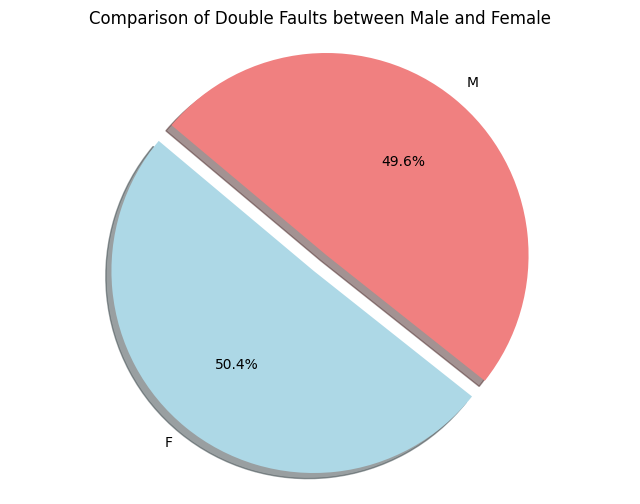

In [14]:
merged_gender_Team = pd.merge(MatchAwayTeamInfo, MatchHomeTeamInfo , on='match_id' , suffixes=('', '_Team'))
merged_gender_faults = pd.merge(PeriodInfo, merged_gender_Team, on='match_id', suffixes=('', '_faults'))

gender_faults = merged_gender_faults[merged_gender_faults['statistic_name'] == 'double_faults'][['match_id', 'statistic_name','gender']].copy()
gender_faults = gender_faults[['match_id', 'statistic_name','gender']].drop_duplicates()

double_faults = pd.Series(gender_faults.groupby('gender')["statistic_name"].count())
display (double_faults)

# plot

labels = double_faults.index
sizes = double_faults.values
colors = ['lightblue', 'lightcoral']  # Example colors, adjust as needed
explode = (0.1, 0)  # Explode the first slice (e.g., female)

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Comparison of Double Faults between Male and Female')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### 9.  Which player has won the most tournaments in a single month?


In [15]:
merged_home = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=['_home'])
merged_away = pd.merge(MatchEventInfo, MatchAwayTeamInfo, on='match_id', suffixes=['_away'])

home_wins = merged_home[merged_home['winner_code'] == 1][['match_id','player_id', 'name']].copy()
away_wins = merged_away[merged_away['winner_code'] == 2][['match_id','player_id', 'name']].copy()

all_wins = pd.concat([home_wins, away_wins])
tournament_wins = pd.merge (all_wins, MatchTournamentInfo, on='match_id', suffixes=['_tournament'])

tournament_count = tournament_wins['tournament_id'].value_counts().reset_index

player_tournament_info = tournament_wins[['player_id', 'name', 'tournament_id']].drop_duplicates()
player_tournament_count = player_tournament_info.groupby('player_id').agg(tournament_sum =('tournament_id','count')).sort_values('tournament_sum', ascending=False)
top_player_id = player_tournament_count.idxmax().values[0]
top_player_name = player_tournament_info[player_tournament_info['player_id'] == int(top_player_id)]['name'].unique()[0]
print(color.RED+ 'The player who won the most tournaments is' +color.END, top_player_name)

The player who won the most tournaments is Kuramochi M.


### 10. Is there a correlation between a player's height and their ranking?


In [71]:
home_players = MatchHomeTeamInfo[["player_id", 'current_rank', "height"]]
away_players = MatchAwayTeamInfo[["player_id", 'current_rank', "height"]]
all_players = pd.concat([home_players, away_players])
cleaned_all_players = all_players.drop_duplicates(subset=['player_id'])
height_mode = float(cleaned_all_players['height'].mode().iloc[0])
cleaned_all_players = cleaned_all_players.fillna(value = height_mode)

x = cleaned_all_players['height']
y = cleaned_all_players['current_rank']
correlation = x.corr(y)

print(color.GREEN + 'correlation = ' + color.END ,correlation.round(2))
if abs(correlation) > 0.5:
    print(color.GREEN +"There is a " + color.YELLOW +" strong relationship" + color.GREEN + " between height and current rank."+color.END)
elif abs(correlation) > 0.3:
    print(color.GREEN +"There is a " + color.YELLOW + "moderate relationship" +color.GREEN +" between height and current rank."+color.END)
else:
    print(color.GREEN +"There is a " + color.YELLOW + "weak relationship" +color.GREEN +" between height and current rank."+color.END)


# Create scatter plot with Plotly
fig = px.scatter(
    cleaned_all_players,
    x='height',
    y='current_rank',
    trendline='ols',  # Add a trendline
    title='Relationship between Height and Current Rank',
    labels={'height': 'Height (cm)', 'current_rank': 'Current Rank'}
)

# Show the plot
fig.show()

correlation =  0.09
There is a weak relationship between height and current rank.


### 11.	What is the average duration of matches?

In [11]:
MatchTimeInfo

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,12303484,Bubelyte K.,bubelyte-klaudija,F,169,NaN,NaN,NaN,NaN,NaN,NaN,2481.0,18433.0,370698,711.0,BUB,Lithuania,"Bubelyte, Klaudija"
1,12301053,Chang S.,chang-sophie,F,394,NaN,"Baltimore, Maryland",1.85,NaN,right-handed,NaN,23573.0,345081.0,98607,364.0,CHA,USA,"Chang, Sophie"
2,12300264,El Aouni A.,el-aouni-aya,F,324,NaN,NaN,NaN,NaN,right-handed,NaN,1689.0,13755.0,371052,788.0,EL,Morocco,"El Aouni, Aya"
3,12276832,Safiullin R.,safiullin-roman,M,4043,"Podolsk, Russia","Podolsk, Russia",1.85,75.0,right-handed,2015.0,272607.0,2011251.0,124930,39.0,SAF,Russia,"Safiullin, Roman"
4,12300112,Villet M.,villet-marie,F,215,NaN,NaN,NaN,NaN,right-handed,NaN,1961.0,27927.0,192346,757.0,VIL,France,"Villet, Marie"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12937,12330861,Džumhur D.,dzumhur-damir,M,2172,"Sarajevo, Bosnia-Herzegovina","Sarajevo, Bosnia-Herzegovina",1.75,68.0,right-handed,2011.0,84664.0,4148544.0,49172,129.0,DZU,Bosnia & Herzegovina,"Dzumhur, Damir"
12947,12331541,Wolff V.,wolff-vivian,F,205,NaN,NaN,NaN,NaN,NaN,NaN,3238.0,29651.0,118526,380.0,WOL,USA,"Wolff, Vivian"
12949,12330766,Juszczak P.,juszczak-pawel,M,430,"Warszawa, Poland","Gdansk, Poland",1.78,70.0,right-handed,NaN,2013.0,83975.0,56577,603.0,JUS,Poland,"Juszczak, Pawel"
12950,12317322,Hong S.,hong-seong-chan,M,872,NaN,Gangwonto,1.75,65.0,right-handed,NaN,51229.0,250012.0,97977,198.0,HON,South Korea,"Hong, Seong Chan"


In [12]:
# first i have the take the table from the begining and read it in the first format 
MatchTimeInfo = pd.read_csv("D:/DATA_Analayses/Project/TennisGame/data/processed/MatchTimeInfo.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()


# Calculate the sum of the periods
MatchTimeInfo['total_seconds'] = (MatchTimeInfo[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].sum(axis=1))/60
# Convert the total time to a timedelta object
MatchTimeInfo['total_time'] = pd.to_timedelta(MatchTimeInfo['total_seconds'], unit='s')
MatchTimeInfo = MatchTimeInfo[['match_id' ,'total_time' ]].sort_values(by='total_time', ascending=False)

groupedTennisTimes_perMatchId = MatchTimeInfo.groupby('match_id').sum().sort_values(by='total_time', ascending=False).drop_duplicates(subset='total_time').reset_index()
# filter out rows in your DataFrame where the total_time is less than 20 minutes
min_time_threshold = pd.Timedelta(minutes=20)
tennisTimeMatchesFiltered = groupedTennisTimes_perMatchId[groupedTennisTimes_perMatchId['total_time'] >= min_time_threshold]
display(tennisTimeMatchesFiltered)
# average 
averageOfTotalTime = tennisTimeMatchesFiltered['total_time'].mean()
print(f"the average of the duration of matches is {averageOfTotalTime}")

,match_id,total_time
0,12300269,0 days 02:17:31.983333333
1,12336297,0 days 02:15:35.183333333
2,12357962,0 days 02:09:03.833333333
3,12346747,0 days 01:35:05.083333332
4,12295121,0 days 01:25:23.900000
...,...,...
66,12350362,0 days 00:22:28.216666667
67,12374447,0 days 00:22:00.650000
68,12316339,0 days 00:21:35.266666667
69,12355090,0 days 00:21:06.933333333


the average of the duration of matches is 0 days 00:48:02.677230046


### 12. What is the average number of games per set in men's matches compared to women's matches?


In [72]:
merge_game_gender = pd.concat([GameInfo[['match_id','set_id','game_id']],
                               merged_gender_Team[['match_id','gender']]])

merge_game_gender.reset_index(inplace=True)

merge_game_gender.drop_duplicates().sort_values("match_id")
match_id= merge_game_gender['match_id'].unique()

match_id_nan_notna =[]
for i in range(match_id.size):
    nullcount_gender = merge_game_gender[merge_game_gender["match_id"]==match_id[i]]["gender"].isna().sum()
    nanullcount_gender = merge_game_gender[merge_game_gender["match_id"]==match_id[i]]["gender"].notna().sum()
    if nullcount_gender != 0:
        if nanullcount_gender !=0:
            match_id_nan_notna.append(i)
match_id_nan_notna = pd.Series(match_id_nan_notna)

for i in match_id_nan_notna:
    merge_game_gender[merge_game_gender["match_id"]==match_id[i]] = (merge_game_gender[merge_game_gender["match_id"]==match_id[i]]
                                                                     .sort_values("gender")
                                                                     .ffill())

pd.options.mode.copy_on_write = True 

cleaned_set_per_Gender = merge_game_gender.drop_duplicates(subset=['match_id'])

replace_nan = (cleaned_set_per_Gender['gender'].mode().iloc[0])

cleaned_set_per_Gender['gender'] = cleaned_set_per_Gender['gender'].fillna(replace_nan)
cleaned_set_per_Gender = cleaned_set_per_Gender.dropna(subset='set_id')

cleaned_set_per_Gender

mean_game_per_set = (pd.pivot_table(cleaned_set_per_Gender,
                                    values= ['game_id'],
                                    index=['gender'],
                                    columns=['set_id'],
                                    aggfunc='mean')).round(2)

mean_game_per_set = mean_game_per_set.fillna(0)
mean_game_per_set

game_id                        
set_id     1.0   2.0   3.0   4.0   5.0
gender                                
F         6.65  8.62  7.63  0.00   0.0
M         7.21  9.13  9.23  9.28  10.1

In [19]:
mean_game_per_set_long = mean_game_per_set.stack(future_stack=True).reset_index()
mean_game_per_set_long.columns = ['gender', 'set_id', 'game_id']

# Plotly figure
fig = px.bar(mean_game_per_set_long, x='gender', y='game_id', color='set_id', barmode='group',
             labels={'game_id': 'Average of games per sets', 'gender': 'Gender'},
             title='Average Number of games per set Between Male vs Female')

fig.show()

### 13.	What is the distribution of left-handed versus right-handed players?

In [83]:
home_players = MatchHomeTeamInfo[["player_id", 'plays']]
away_players = MatchAwayTeamInfo[["player_id", 'plays']]

all_players = pd.concat([home_players, away_players]).drop_duplicates('player_id')
plays_mode = all_players['plays'].mode().iloc[0]
all_players = all_players.fillna(value = plays_mode)


hand_table = all_players.groupby('plays').count()
hand_table['percentage (%)'] = ((hand_table / hand_table['player_id'].sum())*100).round(2)
display(hand_table)


# plot

# Define colors for the pie chart
colors = ['red', 'yellow', 'blue']

# Create the pie chart using Plotly Express
fig = px.pie(
    hand_table,
    values='player_id',  # Use 'player_id' column as values for the pie chart
    names=hand_table.index,  # Use index (handedness) as category names
    title='Distribution of Left-handed vs Right-handed Players',
    hole=0.3,  # Optional: makes it a donut chart
    color_discrete_sequence=colors  # Specify custom colors
)

# Customize the layout
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    width=600,
    height=400,
    margin=dict(r=20, t=40, b=40)  # Adjust the margins as needed
)

# Show the chart
fig.show()


,player_id,percentage (%)
plays,,
ambidextrous,1,0.04
left-handed,120,5.10
right-handed,2231,94.86


### 14.	What is the most common type of surface used in tournaments?

In [21]:
MatchTournamentInfo = MatchTournamentInfo.drop_duplicates('tournament_id')
ground_type = MatchTournamentInfo.groupby('ground_type')['tournament_id'].count()
print(f'The most common type of surface used is: {ground_type.idxmax()}')
display (ground_type)

# plot
colors = ['green', 'red', 'yellow', 'blue']
fig = px.pie(
    ground_type ,
    values= ground_type.values ,
    names=ground_type.index ,
    title='Tennis Ground Types distribution',
    hole=0.3  # Optional: makes it a donut chart
)

# Customize the layout
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    width=400,
    height=400,
    margin=dict(l=20, r=20, t=40, b=20)  # Adjust the margins as needed
)
# Show the chart
fig.show()


The most common type of surface used is: Red clay


ground_type
Hardcourt indoor       4
Hardcourt outdoor     76
Red clay             213
Synthetic outdoor      2
Name: tournament_id, dtype: int64

### 15.	How many distinct countries are represented in the dataset?

In [22]:
country_table1 = pd.concat (([MatchAwayTeamInfo["country"], MatchHomeTeamInfo["country"]]))
country_table_all = pd.concat((country_table1, MatchVenueInfo['country']))
country_table_all.unique()
print(color.DARKCYAN+ "Total number of distinct countries in dataset is" +color.END, country_table_all.unique().size)

Total number of distinct countries in dataset is 100


### 16.	Which player has the highest winning percentage against top 10 ranked opponents?

Step 1: Finding top 10 Players

In [23]:
all_player_with_match_id = (pd.concat([MatchHomeTeamInfo, MatchAwayTeamInfo],
                           ignore_index=True)
                           .sort_values("current_rank", ascending=False)
                           .drop_duplicates(subset=["match_id", "player_id"]))

all_player_with_need_columns = (all_player_with_match_id[["full_name","match_id", "player_id", "current_rank"]]
                               .sort_values(["current_rank", "full_name"], ascending=False, ignore_index=True))

all_player_unique = (all_player_with_need_columns.drop_duplicates("player_id", ignore_index=True)
                    .drop("match_id", axis=1))

top_ten_palyers = (all_player_unique[all_player_unique["current_rank"]
                                    .isin(all_player_unique["current_rank"]
                                    .nlargest(n=10))])
top_ten_palyers

,full_name,player_id,current_rank
0,"Rocens, Martins",236825,1858.0
1,"Amoros Ramos, Pol",152830,1858.0
2,"Stenberg, Jonathan",97381,1800.0
3,"Hsu, Jeffrey Chuan En",171072,1717.0
4,"Zhzhenov, Konstantin",377531,1635.0
5,"Marques, Diogo",221382,1635.0
6,"Bathrinath, Lohithaksha",339989,1611.0
7,"Vatteroni, Lorenzo",253830,1578.0
8,"De Vincentis, Matteo",166096,1578.0
9,"Stoica, Vlad",203673,1525.0


Step 2: Merging tables

In [24]:
match_between_two_player = (all_player_with_need_columns.pivot_table
                           (index="match_id",
                            columns=all_player_with_need_columns.groupby("match_id").cumcount(),
                            values="player_id",
                            aggfunc='first').add_prefix("player")
                            .reset_index())

match_home = MatchHomeTeamInfo[["match_id", "player_id", "current_rank", "full_name"]]
match_away = MatchAwayTeamInfo[["match_id", "player_id", "current_rank", "full_name"]]
match_winner = MatchEventInfo[["match_id", "winner_code"]]


match_winner_home_player_id = pd.merge(match_home, match_winner, how="right" ).drop_duplicates()
match_winner_away_player_id = pd.merge(match_home, match_winner, how="right" ).drop_duplicates()

match_winner_player_id = pd.concat([match_winner_home_player_id, match_winner_away_player_id])

winner_player = match_winner_player_id[match_winner_player_id["winner_code"] == 2]

winner_in_each_match = pd.merge(match_between_two_player, winner_player)

series_of_match_id_top_player_played = (all_player_with_need_columns
                                        [all_player_with_need_columns["player_id"]
                                         .isin(top_ten_palyers["player_id"])]
                                         ["match_id"])

winer_in_each_match_top_player_played = (winner_in_each_match[winner_in_each_match["match_id"]
                                                             .isin(series_of_match_id_top_player_played)]).dropna(axis=0)
who_win_from_top_ten = (winer_in_each_match_top_player_played
                        [~(winer_in_each_match_top_player_played["player_id"]
                           .isin(top_ten_palyers["player_id"]))])
best_palayer_in_playe_top_ten = (who_win_from_top_ten.groupby("player_id")["winner_code"]
                                 .agg("count").reset_index()
                                 .sort_values("winner_code",ascending=False))
top_player = all_player_unique[all_player_unique["player_id"] == int(best_palayer_in_playe_top_ten.iloc[0]["player_id"])]
top_player


,full_name,player_id,current_rank
538,"Han, Seon Yong",196408,1146.0


### 17. What is the average number of breaks of serve per match?


In [60]:

break_points =PeriodInfo[(PeriodInfo['statistic_name']=='break_points_converted') & (PeriodInfo['period']=='ALL')]

#first : Convert 'home_stat' and 'away_stat' columns to integers - secoend: Adding the new column 'sum_break_points'
break_points['sum_break_points'] = break_points['home_stat'].astype(int) + break_points['away_stat'].astype(int)
break_points['count_same_sum'] =( break_points.groupby('sum_break_points')['sum_break_points'].transform('count'))

# Count matches with the same sum of break points
break_points_count = break_points['sum_break_points'].value_counts().reset_index()
break_points_count.columns = ['sum_break_points', 'count']


Average_breaks_of_serve_per_match =break_points['sum_break_points'].mean().round(2)



print(color.GREEN + 'the average number of breaks of serve per match is ' + color.END ,  Average_breaks_of_serve_per_match)



the average number of breaks of serve per match is  7.42


In [61]:

# Create a bar plot
fig = px.bar(
    break_points_count,
    x='sum_break_points',
    y='count',
    color='sum_break_points',
    title='Breaks of Serve per Match',
    labels={'sum_break_points': 'Sum of Break Points', 'count': 'Count of Matches'},
    height=600,
    width=800
)

# Add a line representing the average breaks of serve per match
fig.add_trace(go.Scatter(
    x=[Average_breaks_of_serve_per_match, Average_breaks_of_serve_per_match],
    y=[0, break_points_count['count'].max()],
    mode='lines',
    name=f'Average: {Average_breaks_of_serve_per_match}',
    line=dict(color='red', dash='dash')
))

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Sum of Break Points',
    yaxis_title='Count of Matches',
    barmode='group'
)

# Show the figure
fig.show()



# -------- Extra Questions ---------

### 18. The proportion of countries represented by the top 100 tennis players

In [27]:
# Combine home and away team info to get a list of all players
players_df = pd.concat([MatchHomeTeamInfo[['player_id', 'full_name','gender', 'current_rank', 'country']], 
                        MatchAwayTeamInfo[['player_id', 'full_name','gender' ,'current_rank', 'country']]])

# Remove duplicates and sort by rank
players_df = players_df.drop_duplicates(subset=['player_id']).sort_values(by='current_rank' ,ascending=False)
display(players_df)
# Filter the top 100 players
top_100_players = players_df.head(100)

# Count the number of players from each country
country_counts = top_100_players['country'].value_counts()

country_counts_df = country_counts.reset_index()
country_counts_df.columns = ['country', 'count']

# Plotly figure
fig = px.bar(country_counts_df, x='country', y='count', 
             labels={'count': 'Number of Players', 'country': 'Country'},
             title='Proportion of Countries Among the Top 100 Tennis Players')

fig.update_layout(
    xaxis=dict(tickmode='array', tickangle=45),
    yaxis=dict(title='Number of Players'),
    title={'x': 0.5}
)



,player_id,full_name,gender,current_rank,country
7393,152830,"Amoros Ramos, Pol",M,1858.0,Spain
1852,236825,"Rocens, Martins",M,1858.0,Latvia
758,97381,"Stenberg, Jonathan",M,1800.0,Sweden
1547,171072,"Hsu, Jeffrey Chuan En",M,1717.0,Chinese Taipei
515,377531,"Zhzhenov, Konstantin",M,1635.0,Russia
...,...,...,...,...,...
3652,232087,"Bergen, Mariia",F,NaN,Ukraine
4320,151258,"Jang, Eun Se",F,NaN,South Korea
7576,196406,"Shannan Zayid, Mubarak",M,NaN,Qatar
9709,267623,"Garcia, Raul",M,NaN,Bolivia


### 19. What proportion of the predictions became real ??

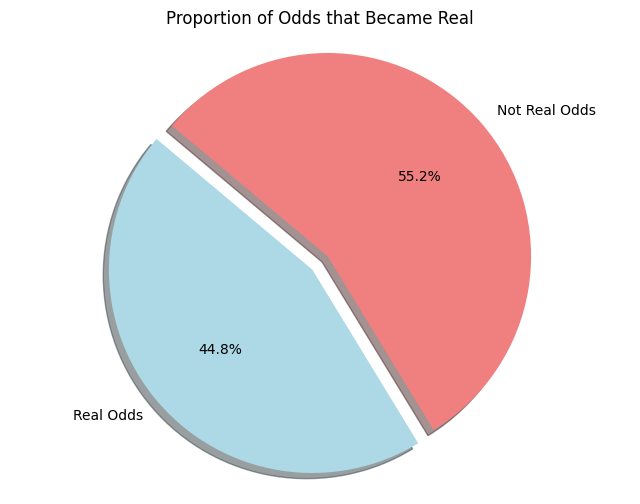

In [28]:
real_odds_count = OddsInfo['winnig'].sum()
not_real_odds_count = len(OddsInfo) - real_odds_count

# Plotting the pie chart
labels = ['Real Odds', 'Not Real Odds']
sizes = [real_odds_count, not_real_odds_count]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Real Odds)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Proportion of Odds that Became Real')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 20. Comparison the performance of players in different rounds by gender

In [29]:
merged_game_home = pd.merge(GameInfo, MatchHomeTeamInfo, on='match_id', suffixes=['_home']).drop_duplicates()
merged_game_away = pd.merge(GameInfo, MatchAwayTeamInfo, on='match_id', suffixes=['_away']).drop_duplicates()
# Ignore null values
home_game_wins = merged_game_home[merged_game_home['scoring'] == 1][['match_id','player_id', 'full_name']].copy()
away_game_wins = merged_game_away[merged_game_away['scoring'] == 2][['match_id','player_id', 'full_name']].copy()

# Concating home and away team wins
all_game_wins = pd.concat([home_game_wins, away_game_wins]).drop_duplicates()
winnersBYGender = pd.merge(players_df[['full_name' , 'gender']] , all_game_wins, on='full_name')
winners_with_rounds= pd.merge(winnersBYGender , MatchRoundInfo[[ 'match_id', 'name']], on='match_id')


hand_gender_counts = winners_with_rounds.groupby(['name', 'gender']).size().unstack(fill_value=0)
# Plotting
hand_gender_counts = hand_gender_counts.reset_index()

# Plotly figure
fig = px.bar(hand_gender_counts, x='name', y=hand_gender_counts.columns[1:], 
             labels={'value': 'Number of Players', 'round': 'Rounds'},
             title='Player Performances')

fig.update_layout(
    xaxis=dict(title='Rounds'),
    yaxis=dict(title='Number of Players'),
    barmode='group'
)

fig.show()

### 21. What kind of Tournaments have been held in each country?

In [30]:
# Sample data similar to the description
Countries_with_Tournaments = pd.merge( MatchVenueInfo[['match_id' , 'country']] , MatchTournamentInfo[['match_id','tournament_category_name']] ,  on='match_id')
Countries_with_Tournaments.columns
tournament_counts = Countries_with_Tournaments.groupby(['country', 'tournament_category_name']).size().unstack(fill_value=0).reset_index()

tournament_counts_long = tournament_counts.melt(id_vars=['country'], var_name='Tournament Name', value_name='Number of Tournaments')

# Create the stacked bar plot using Plotly
fig = px.bar(
    tournament_counts_long,
    x='country',
    y='Number of Tournaments',
    color='Tournament Name',
    title='Tournaments Held in Each Country',
    labels={'Number of Tournaments': 'Number of Tournaments', 'country': 'Country'},
    height=500,
    width=800
)


# Customize the layout for a more modern look
fig.update_layout(
    title={
        'text': 'Tournaments Held in Each Country',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    legend_title_text='Tournament Name',
    legend=dict(
        orientation="v",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    barmode='stack',
    xaxis_title='Country',
    yaxis_title='Number of Tournaments'
)

# Save the chart to an HTML file
fig.write_html("tournaments_held_in_each_country.html")

# Output message to inform the user
print(color.GREEN+"The chart has been saved to" +color.YELLOW+' tournaments_held_in_each_country.html'+color.GREEN+'.\n'+color.PURPLE+" Open this file in a web browser to view the chart."+color.END)
fig.show()

The chart has been saved to tournaments_held_in_each_country.html.
 Open this file in a web browser to view the chart.


### 22. Comback : How often does the player win the match after losing the first point?

In [31]:
# table for set1, game 1 and point 1
comeback_table = GameInfo[(GameInfo['set_id'] == 1) & (GameInfo['game_id'] == 1) & (GameInfo['point_id'] == 0)].drop(columns=['point_description','home_point_type', 'away_point_type', 'home_score', 'away_score', 'serving' ])

# change dtype from object to int
comeback_table[['home_point', 'away_point']] = comeback_table[['home_point', 'away_point']].astype(int)

# 1: home gets the first point
# 2: away gets the first point
comeback_table['first_point_win'] = np.where(comeback_table['home_point'] == 0, 2, 1)



# 1 : first point and final result the same
# 0: first point and final result not the same
comeback_table['final_result'] = np.where(comeback_table['scoring'] == comeback_table['first_point_win'], 1, 0)

# The percentage of comebacks
comeback_table_count = pd.DataFrame(comeback_table.groupby('final_result')['match_id'].count())
comeback_table_count['percentage'] = ((comeback_table_count / comeback_table_count.sum())*100).round(2)
display(comeback_table_count)
print('In 66% of matches, the player gets the first point win the match')

# plot
colors = ['green', 'yellow']
fig = px.pie(
    comeback_table_count ,
    values= comeback_table_count['percentage'] ,
    names=['Lose', 'Win'] ,
    title='Comeback after loosing first point',
    hole=0.3  # Optional: makes it a donut chart
)

# Customize the layout
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    width=400,
    height=400,
    margin=dict(l=20, r=20, t=40, b=20)  # Adjust the margins as needed
)
# Show the chart
fig.show()


,match_id,percentage
final_result,,
0,2180,33.26
1,4375,66.74


In 66% of matches, the player gets the first point win the match


### 23. Most tournaments are held in which cities of the most popular host country?

In [18]:
""" finding the most popular country """
Countries_with_Tournaments = pd.merge( MatchVenueInfo[['match_id' , 'country']] , MatchTournamentInfo[['match_id','tournament_category_name']] ,  on='match_id')
tour_count = Countries_with_Tournaments.groupby(['country', 'tournament_category_name']).size().unstack(fill_value=0)
totalMatches = tour_count.groupby('country').sum().sum(axis=1).sort_values(ascending=False)
most_popular_country = totalMatches.idxmax()
print (f"the most popular host country is : {most_popular_country}")
"""now calculating the mathces in each of the cities of the popular country """
popular_matches = MatchVenueInfo[MatchVenueInfo['country'] == most_popular_country]
grouped_cities =(popular_matches.groupby('city' ,as_index= False)
                 .agg(totalPlayes = ('match_id','count'))
                 .sort_values('totalPlayes', ascending=False))
grouped_cities

the most popular host country is : France


,city,totalPlayes
5,Paris,517
7,Saint-Gaudens,57
2,Carnac,56
3,Deauville,55
4,Lyon,42
1,Bordeaux,40
8,Strasbourg,40
0,Aix-en-Provence,26
6,Saint Malo,20


### 24. What is the Average number of Serves per match?

Average servis per match is 113.535


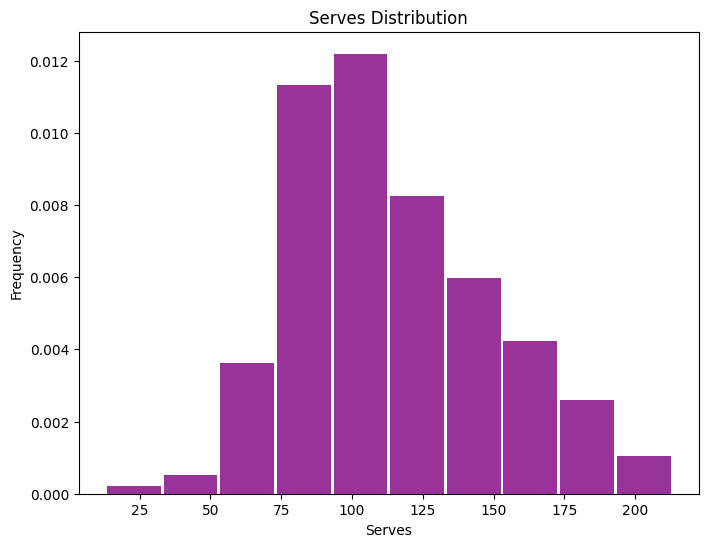

In [33]:
point_each_game = (GameInfo[["match_id", "set_id", "home_point", "away_point", "scoring"]]
                   .groupby("match_id")["scoring"].count()
                   .sort_values(ascending=False))

Q1 = point_each_game.quantile(0.25)
Q3 = point_each_game.quantile(0.75)
IQR = Q3 - Q1

point_each_game_cleaned = (point_each_game[~((point_each_game < (Q1 - 1.5 * IQR)) 
                                            |
                                            (point_each_game > (Q3 + 1.5 * IQR)))])

print(color.GREEN+ 'Average servis per match is' +color.END, point_each_game_cleaned.mean().round(3))



# plot
data = point_each_game_cleaned.values
plt.figure(figsize=(8,6))
plt.hist(data, bins=10, density=True, alpha=0.8, rwidth=0.95, color='purple')
plt.title ('Serves Distribution')
plt.xlabel('Serves')
plt.ylabel('Frequency')
plt.show()